Method-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

Found 122 images belonging to 26 classes.
Found 78 images belonging to 26 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

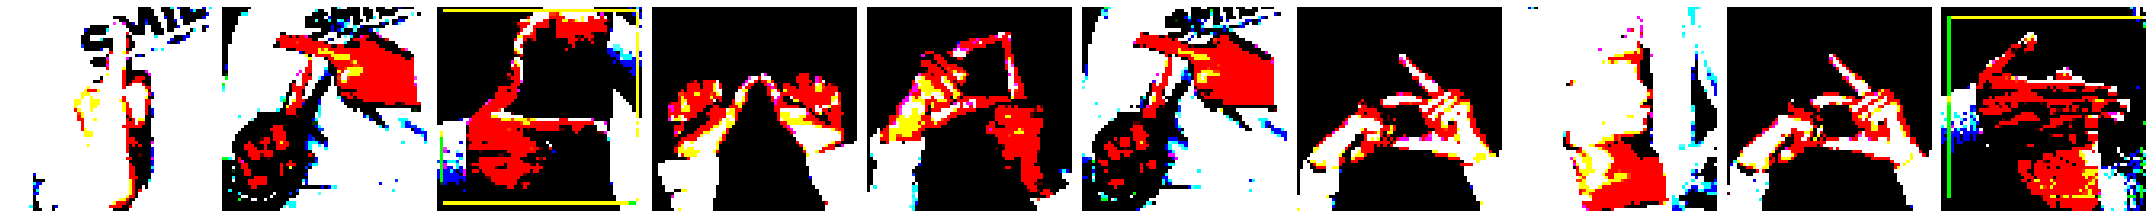

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [ ]:
train_path = r'/content/drive/MyDrive/project_dataset/train_Unzipped_Files.zip' 
test_path = r'/content/drive/MyDrive/project_dataset/test_Unzipped_Files.zip'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

imgs, labels = next(train_batches)


#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [ ]:
history2 = model.fit(train_batches, epochs=11, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/30
13/13 [==============================] - 2s 159ms/step - loss: 1.0448 - accuracy: 0.7213 - val_loss: 0.5430 - val_accuracy: 0.8846
Epoch 2/30
13/13 [==============================] - 2s 154ms/step - loss: 0.9211 - accuracy: 0.7295 - val_loss: 0.5323 - val_accuracy: 0.8462
Epoch 3/30
13/13 [==============================] - 2s 156ms/step - loss: 0.9337 - accuracy: 0.6885 - val_loss: 0.5226 - val_accuracy: 0.8590
Epoch 4/30
13/13 [==============================] - 2s 161ms/step - loss: 0.7802 - accuracy: 0.7869 - val_loss: 0.5079 - val_accuracy: 0.8718
Epoch 5/30
13/13 [==============================] - 2s 160ms/step - loss: 0.8557 - accuracy: 0.7377 - val_loss: 0.4789 - val_accuracy: 0.9103
Epoch 6/30
13/13 [==============================] - 2s 155ms/step - loss: 0.8583 - accuracy: 0.7213 - val_loss: 0.4620 - val_accuracy: 0.8974
Epoch 7/30
13/13 [==============================] - 2s 154ms/step - loss: 0.7674 - accuracy: 0.8033 - val_loss: 0.4616 - val_accuracy: 0.8974
Epoch 

In [ ]:
#model.save('best_model_dataflair.h6')
model.save('best_model_dataflair3.h6')

INFO:tensorflow:Assets written to: best_model_dataflair3.h6/assets


{'loss': [1.04482102394104, 0.9211069941520691, 0.9336980581283569, 0.7802459001541138, 0.8556691408157349, 0.858281672000885, 0.767430305480957, 0.7083407044410706, 0.6739166975021362, 0.8047502040863037, 0.755810022354126], 'accuracy': [0.7213114500045776, 0.7295082211494446, 0.688524603843689, 0.7868852615356445, 0.7377049326896667, 0.7213114500045776, 0.8032786846160889, 0.8032786846160889, 0.8278688788414001, 0.7786885499954224, 0.7540983557701111], 'val_loss': [0.5429948568344116, 0.5322914123535156, 0.5226361155509949, 0.5079309344291687, 0.4789135754108429, 0.4620080590248108, 0.46163514256477356, 0.5045086741447449, 0.446968138217926, 0.44981393218040466, 0.4861891269683838], 'val_accuracy': [0.8846153616905212, 0.8461538553237915, 0.8589743375778198, 0.8717948794364929, 0.9102563858032227, 0.8974359035491943, 0.8974359035491943, 0.8461538553237915, 0.8589743375778198, 0.8846153616905212, 0.8461538553237915], 'lr': [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

predictions on a small set of test data--

n   n   b   a   d   p   w   g   r   p   

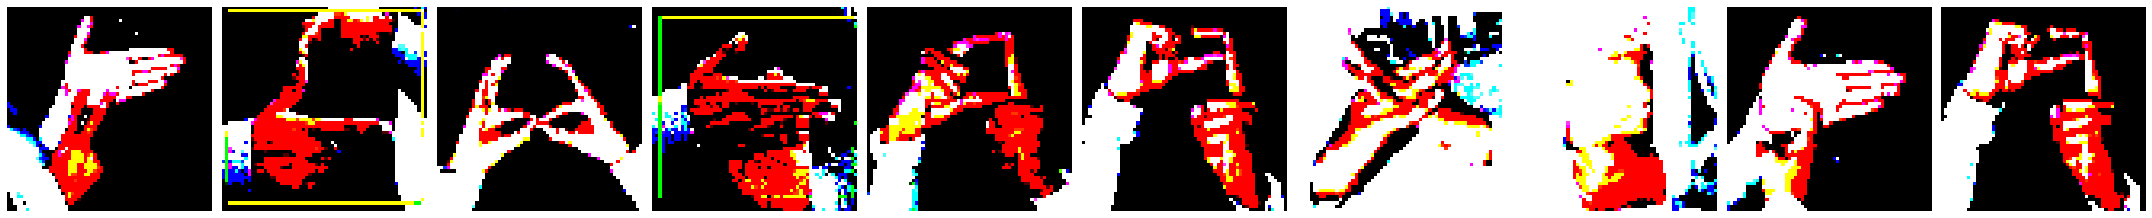

Actual labels
n   j   b   h   d   p   w   g   r   p   (10, 64, 64, 3)


{'accuracy': [0.7213114500045776,
  0.7295082211494446,
  0.688524603843689,
  0.7868852615356445,
  0.7377049326896667,
  0.7213114500045776,
  0.8032786846160889,
  0.8032786846160889,
  0.8278688788414001,
  0.7786885499954224,
  0.7540983557701111],
 'loss': [1.04482102394104,
  0.9211069941520691,
  0.9336980581283569,
  0.7802459001541138,
  0.8556691408157349,
  0.858281672000885,
  0.767430305480957,
  0.7083407044410706,
  0.6739166975021362,
  0.8047502040863037,
  0.755810022354126],
 'lr': [0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005],
 'val_accuracy': [0.8846153616905212,
  0.8461538553237915,
  0.8589743375778198,
  0.8717948794364929,
  0.9102563858032227,
  0.8974359035491943,
  0.8974359035491943,
  0.8461538553237915,
  0.8589743375778198,
  0.8846153616905212,
  0.8461538553237915],
 'val_loss': [0.5429948568344116,
  0.5322914123535156,
  0.5226361155509949,
  0.5079309344291687,
  0.4789135754108429,
  

In [ ]:
print(history2.history)

imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h6")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


word_dict = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',12:'m',13:'n',14:'o',15:'p',16:'q',17:'r',
             18:'s',19:'t',20:'u',21:'v',22:'w',23:'x',24:'y',25:'z'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

history2.history

Method-2

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/project_dataset/train_Unzipped_Files.zip',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/project_dataset/test_Unzipped_Files.zip',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 122 images belonging to 26 classes.
Found 78 images belonging to 26 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_9 (Dense)              (None, 26)               

In [ ]:
history = model.fit(train_generator,
                         steps_per_epoch = 4,
                         epochs = 5,
                         validation_data = test_generator,
                         validation_steps = 16)

Epoch 1/5
4/4 [==============================] - 2s 455ms/step - loss: 0.8528 - accuracy: 0.8361 - val_loss: 0.6318 - val_accuracy: 0.8462
Epoch 2/5
4/4 [==============================] - 1s 177ms/step - loss: 0.6134 - accuracy: 0.9098
Epoch 3/5
4/4 [==============================] - 1s 169ms/step - loss: 0.6007 - accuracy: 0.8279
Epoch 4/5
4/4 [==============================] - 1s 189ms/step - loss: 0.4534 - accuracy: 0.9180
Epoch 5/5
4/4 [==============================] - 1s 186ms/step - loss: 0.3046 - accuracy: 0.9508


In [ ]:
model.save('model_keras.h7')

INFO:tensorflow:Assets written to: model_keras.h7/assets


In [ ]:
model = load_model('model_keras.h7')

In [ ]:
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

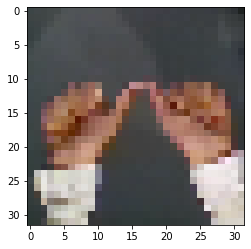

In [ ]:
filename = r'/content/1.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
test_image = image.load_img(filename, target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = get_result(result)
print('Predicted Alphabet is: {}'.format(result))

Predicted Alphabet is: a
